# Determinant QMC data visualization

## Load simulation data

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

sns.set()

# Are you testing (0) or making plots (1)?

SAVEPLOTS = bool(0) # 0 for false, 1 for true

# Retrieve simulation parameters

simulationParameters = np.loadtxt('simulationParameters.txt', usecols = 1)

NSITES = int(simulationParameters[0])
dt = simulationParameters[1]
beta = simulationParameters[2]
L = int(simulationParameters[3])
t = simulationParameters[4]
U = simulationParameters[5]
mu = simulationParameters[6]
totalMCSweeps = int(simulationParameters[7])
freq = int(simulationParameters[8])
intsize = int(simulationParameters[9])

# Load weights to plot

measurements = np.loadtxt('measurements.txt', skiprows = 1)

weights = measurements[:, 0]

M = weights.size

time = np.arange(M) + 1  #measured in sweeps

directory1 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

directory2 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '/data-to-reproduce')
            
if not os.path.exists(directory1):
    os.makedirs(directory1)
    
if not os.path.exists(directory2):
    os.makedirs(directory2)
    
np.savetxt(directory2 + '/weights_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (weights))
np.savetxt(directory2 + '/simulationParameters_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (simulationParameters))

In [62]:
time.size

2048

# Metropolis Sampling convergence

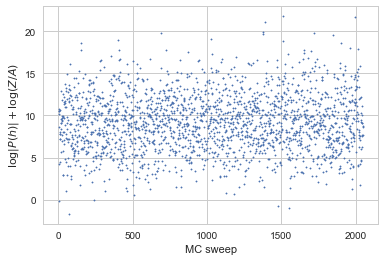

In [63]:
sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.scatter(time, np.log(abs(weights)), s = 2)
plt.xlabel('MC sweep')
plt.ylabel(r'$\log | P(h) | + \log (Z/A)$')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/weightsVsMCstep' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '.png', dpi = 600)

# Sign problem

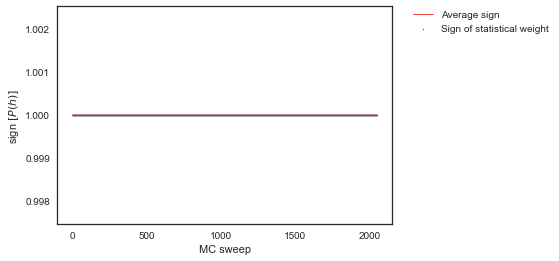

In [64]:
sns.set_style("white")
signs = measurements[:, 1]
avSign = np.mean(signs) * np.ones(len(time))
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.set_color_codes("dark")

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.xlabel('MC sweep')
plt.ylabel('sign' + r' $[P(h)]$ ')

ax.scatter(time, signs, s = 1, color = "#34495e", label = 'Sign of statistical weight')
ax.plot(time, avSign, linewidth = 1, color = "#e74c3c", label = 'Average sign')
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/avSign' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '.png', dpi = 600,
                bbox_extra_artists=(lgd,), bbox_inches='tight')

# Measuring electron density

In [65]:
electronDensity = measurements[:, 2] - 1
np.savetxt(directory2 + '/electronDensity' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (electronDensity))

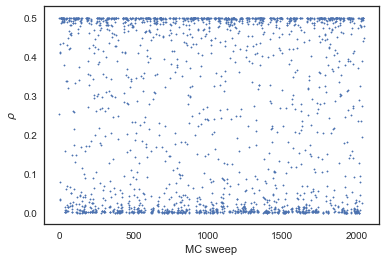

In [66]:
plt.scatter(time, electronDensity, s = 2)
plt.xlabel('MC sweep')
plt.ylabel(r'$\rho$')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/electronDensity' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '.png', dpi = 600)

In [67]:
np.mean(electronDensity)

0.26108301757812502

In [68]:
np.sqrt( np.var(electronDensity)  / electronDensity.size)

0.0048500055852875399

In [33]:
doubleOc = measurements[:, 3]
np.savetxt(directory2 + '/doubleOc' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (doubleOc))

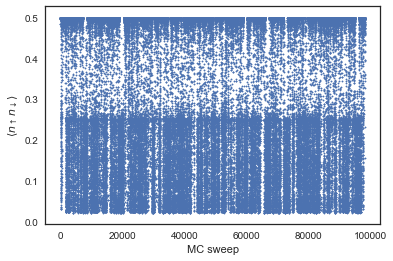

In [34]:
plt.scatter(time, doubleOc, s = 2)
plt.xlabel('MC sweep')
plt.ylabel(r'$\left\langle n_\uparrow n_\downarrow \right\rangle$')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/doubleOc' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '.png', dpi = 600)

# Auto-correlation time

In [35]:
m = np.mean(doubleOc)
m

0.3232607227345784

In [26]:
tMax = int(totalMCSweeps * L / 10)
chi1 = np.zeros(tMax)
chi2 = np.zeros(tMax)
doubleTrunc = doubleOc[:tMax]
densTrunc = electronDensity[:tMax]

In [27]:
for i in range(tMax):
    chi1[i] = np.sum( ( doubleOc[:tMax] - m ) * ( doubleOc[i:i + tMax] - m ) )
    chi2[i] = np.sum( ( electronDensity[:tMax] - m ) * ( electronDensity[i:i + tMax] - m ) )

In [28]:
chi2

array([ 547.316415  ,  542.43754511,  537.77990553, ...,   34.52714525,
         33.59214538,   32.56965635])

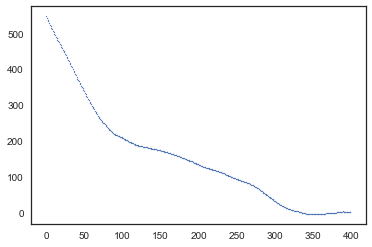

In [29]:
plt.scatter(np.arange(tMax)[:400], chi2[:400], s = 1)

In [30]:
densityTrunc = np.zeros(int(totalMCSweeps * L / 800) + 1)
for t_ in time:
    if t_ % 800 == 0:
        densityTrunc[int(t_ / 800)] = doubleOc[t_]

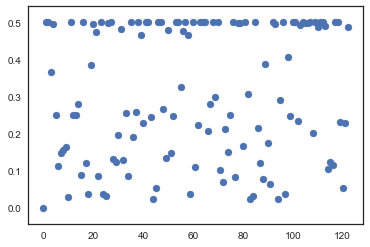

In [31]:
plt.scatter(np.arange(densityTrunc.size), densityTrunc)

In [32]:
np.mean(densityTrunc)

0.30900116097560976

In [33]:
np.var(densityTrunc)

0.0322505473713975